In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## 1. Look at HallOfFame table

In [2]:
hof = pd.read_csv("HallOfFame.csv")
hof.shape

(4191, 9)

### 1.1 Remain the data with category of Player

In [3]:
hof_player = hof[hof['category']=='Player']
hof_player.shape

(4066, 9)

### 1.2 Find out the ways players were elected to the Hall of Fame

In [4]:
hof_player.votedBy.value_counts()

BBWAA               3698
Veterans             142
Run Off               81
Nominating Vote       76
Old Timers            25
Final Ballot          21
Negro League          21
Special Election       2
Name: votedBy, dtype: int64

In [5]:
hof_player[hof_player['inducted']=='Y'].votedBy.value_counts()

BBWAA               123
Veterans             82
Old Timers           25
Negro League         21
Run Off               3
Special Election      2
Name: votedBy, dtype: int64

In [6]:
hof_player[hof_player['inducted']=='Y'].shape

(256, 9)

In [8]:
# calculte servingDays and debutAge
player = pd.read_csv("People.csv",parse_dates=["debut","finalGame","birthYear"])
player['servingDays']=(player["finalGame"] - player["debut"]).apply(lambda x: x.days)
player['debutAge']=(player["debut"] - player["birthYear"]).apply(lambda x: x.days/365)
player.shape

(19370, 26)

### 2.1 Delete players whose finalGame are after 2012,
which means they can not be able to be elected now.

In [9]:
player = player[player['debut'].apply(lambda x: x.year>=1942)]
player.shape

(11881, 26)

In [10]:
player = player[player['finalGame'].apply(lambda x: x.year<=2012)]
player.shape

(9468, 26)

In [11]:
player = player.join(hof_player[hof_player.inducted == "Y"][["playerID","inducted"]].set_index("playerID"),\
                     on="playerID")
player.inducted.fillna("N",inplace=True)
player.shape

(9468, 27)

In [17]:
merged_player = player[['playerID','debut','finalGame','weight','servingDays', 'debutAge', 'inducted']]
merged_player.shape

(9468, 7)

In [18]:
batting = pd.read_csv("Batting.csv")

In [19]:
batting = batting[['playerID','G']].groupby('playerID').sum()

In [20]:
merged_player2 = batting.merge(merged_player, on="playerID")

In [24]:
players_N = merged_player2[merged_player2['inducted']=='N']
players_Y = merged_player2[merged_player2['inducted']=='Y']

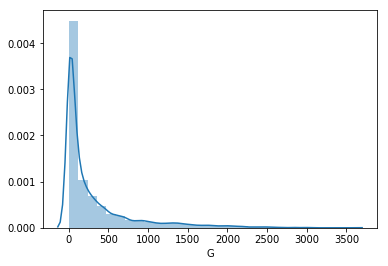

In [27]:
sns.distplot(merged_player2.G, bins=30)

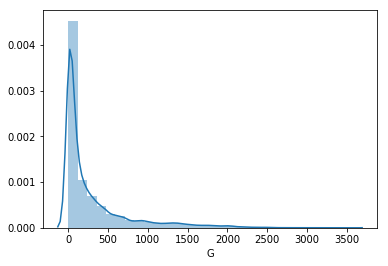

In [26]:
sns.distplot(players_N.G, bins=30)

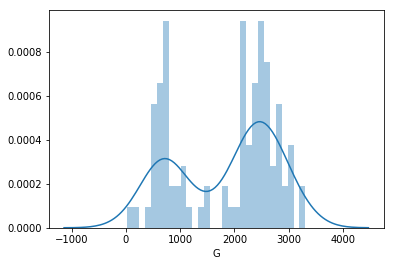

In [25]:
sns.distplot(players_Y.G, bins=30)

In [42]:
pitching1 = pd.read_csv('Pitching.csv')

In [43]:
pitching1.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [ ]:
# WHIP = (BB+H)/IP (IPOuts=IP*3)

In [39]:
pitching_col = ['playerID','W','L','BB','H','IPouts','ERA']
pitching = pitching[pitching_col].groupby('playerID').mean()

# new features
pitching['WHIP']=(pitching['BB']+pitching['H'])/pitching['IPouts'] * 3
pitching['W-L']=pitching['W']/(pitching['W']+pitching['L'])


In [48]:
pitching = pitching[pitching['W']+pitching['L']>0]

In [52]:
pitching.dropna(axis=0,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
pitching.head()

,W,L,BB,H,IPouts,ERA,WHIP,W-L
playerID,,,,,,,,
aardsda01,1.777778,2.000000,20.333333,32.888889,112.333333,5.194444,1.421365,0.470588
aasedo01,5.076923,4.615385,35.153846,83.461538,256.000000,3.493077,1.390024,0.523810
abadfe01,0.888889,3.000000,12.555556,33.333333,105.888889,4.073333,1.300105,0.228571
abbeybe01,3.666667,6.666667,32.000000,114.333333,284.000000,4.678333,1.545775,0.354839
abbotda01,0.000000,2.000000,8.000000,19.000000,39.000000,6.230000,2.076923,0.000000


In [54]:
pitching_col = ['ERA','WHIP','W-L']
merged_player3 = pitching[pitching_col].merge(merged_player2, on="playerID")
merged_player3.shape

(4067, 11)

In [56]:
merged_player3.head()

,playerID,ERA,WHIP,W-L,G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aasedo01,3.493077,1.390024,0.523810,448,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
1,abbotgl01,4.331667,1.366252,0.427586,248,1973-07-29,1984-08-08,200.0,4028.0,22.589041,N
2,abbotji01,4.496364,1.433094,0.446154,263,1989-04-08,1999-07-21,200.0,3756.0,22.282192,N
3,abbotky01,8.442500,1.543165,0.190476,57,1991-09-10,1996-08-24,200.0,1810.0,23.706849,N
4,abbotpa01,5.511667,1.491674,0.537500,162,1990-08-21,2004-08-07,185.0,5100.0,23.652055,N


In [58]:
31/4036

0.007680872150644202

In [57]:
merged_player3.inducted.value_counts()

N    4036
Y      31
Name: inducted, dtype: int64

In [59]:
merged_player3.to_csv("merged_pitching42-12.csv")